# The Central Limit Theorem
<hr>

Let $\{X_1, X_2, ..., X_n\}$ be random variables sampled independently from the same distribution with mean $\mu$ and variance $\sigma^2$. Let $\bar{X_n}$ be the average of $X_1, X_2, ..., X_n$ then for any fixed number x we have 

$$\lim_{n \rightarrow \infty}P(\frac{\bar{X_n}-\mu}{\sigma / \sqrt{n}} \le x) = \lim_{n \rightarrow \infty}P(\frac{\sqrt{n}}{\sigma}(\bar{X_n} - \mu) \le x) = \Phi(x)$$

where $\Phi(x)$ is the standard normal cumulative density function.

## In other words

For almost any distribution if we sample from it sufficiently many times, then the average of the variables $\bar{X_n}$ approximates a normal distribution with mean $\mu$ and variance $\sigma^2/n$. So when we standardize the distribution of $\bar{X_n}$ the new distribution approximates the standard normal distribution.

This means if we take a large enough sample from any distribution the mean will be normally distributed. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')
sns.set()

## Example

We can create any distribution we want and show the CLT holds.

In [3]:
# We create a random distribution 
dist1 = np.random.randint(1, 11, 500)
dist2 = np.random.randint(8, 11, 500)
dist = np.array([dist1, dist2]).flatten()
dist = {n: (dist == n).sum() / len(dist) for n in range(1, 11)}
# NOTE: For every value in our distribution, 
# the sum of all the probabilities should equal 1.
print(dist)
sum(dist.values())

{1: 0.044, 2: 0.05, 3: 0.048, 4: 0.05, 5: 0.05, 6: 0.041, 7: 0.051, 8: 0.225, 9: 0.225, 10: 0.216}


0.9999999999999999

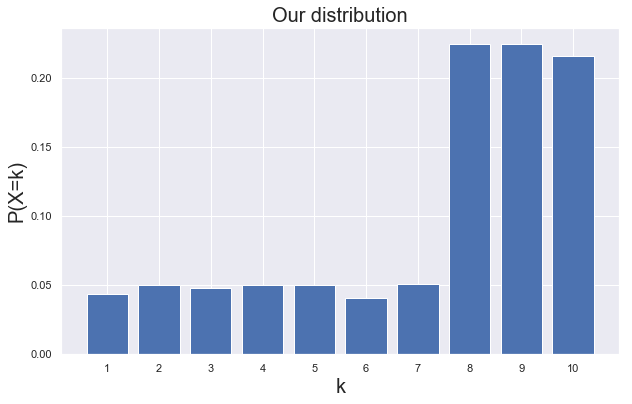

In [4]:
plt.figure(figsize=(10,6))
plt.bar(dist.keys(), dist.values())
plt.title('Our distribution', fontsize=20)
plt.xticks(range(1,11))
plt.xlabel('k', fontsize=20)
plt.ylabel('P(X=k)', fontsize=20);

We know that the mean (or expectation) of any probability distribution is $\mu = \sum_k k * P(X=k)$

Now if take a sample from this distribution and find it's average it should be normally distributed. Furthermore, the bigger our sample size (n) the more normal the distribution of the sample means will look.

So here's the process:
1. Sample n points from the distribution.
2. Calculate the mean.
3. Repeat 10,000 times.
4. Plot the distribution of the means (spoiler it should look normal).

We'll start with a sample size of $n=4$ plot the distribution of means and repeat with increasing sample sizes. We should see the histograms start to look more and more normally distributed as we icrease n.

In [29]:
dist_vals = list(dist.keys())
dist_probs = list(dist.values())

In [ ]:
dist_mean = (dist_vals * dist_probs).sum()
print(f'The mean of our ')

In [31]:
means = []
for _ in range(10_000):
    sample = np.random.choice(dist_vals, p=dist_probs, size=4)
    means.append(sample.mean())

In [32]:
means

[8.25,
 7.0,
 8.0,
 8.0,
 7.5,
 8.75,
 8.25,
 7.0,
 9.0,
 8.25,
 6.5,
 6.25,
 8.5,
 8.25,
 4.5,
 7.25,
 8.75,
 7.25,
 6.0,
 7.75,
 6.75,
 8.25,
 8.5,
 8.0,
 5.0,
 6.75,
 7.75,
 8.5,
 5.5,
 7.25,
 5.0,
 7.5,
 7.0,
 7.5,
 7.0,
 3.5,
 9.25,
 8.25,
 8.25,
 7.25,
 8.75,
 7.25,
 7.25,
 4.25,
 7.75,
 8.5,
 6.5,
 7.75,
 8.0,
 7.0,
 8.75,
 8.25,
 8.0,
 7.75,
 8.0,
 8.5,
 6.25,
 6.75,
 5.25,
 8.25,
 9.0,
 9.5,
 6.5,
 6.25,
 6.5,
 7.0,
 6.0,
 7.75,
 7.5,
 8.5,
 8.25,
 8.0,
 8.0,
 5.5,
 4.25,
 8.0,
 7.75,
 4.75,
 7.0,
 6.5,
 7.25,
 7.75,
 8.25,
 7.5,
 8.0,
 6.25,
 6.5,
 6.25,
 8.25,
 8.25,
 9.25,
 7.75,
 6.75,
 6.0,
 7.25,
 5.25,
 7.0,
 9.5,
 6.5,
 6.75,
 7.0,
 6.25,
 8.0,
 6.25,
 8.25,
 9.5,
 5.75,
 7.0,
 7.25,
 6.5,
 8.0,
 8.0,
 7.5,
 8.0,
 6.0,
 4.0,
 9.25,
 8.0,
 6.0,
 9.25,
 6.75,
 7.25,
 6.75,
 7.25,
 7.75,
 8.0,
 6.75,
 7.0,
 8.75,
 6.5,
 7.0,
 9.0,
 8.5,
 7.25,
 7.25,
 8.5,
 7.5,
 7.5,
 6.5,
 7.5,
 6.5,
 3.5,
 8.25,
 9.25,
 5.75,
 8.75,
 9.5,
 6.0,
 5.5,
 9.75,
 9.25,
 7.75,
 7.0,
 6.0,
 9